In [3]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

--2018-09-15 17:43:19--  https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.0
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3759647 (3.6M) [application/vnd.ms-excel]
Saving to: ‘train.csv’

train.csv           100%[=====================>]   3.58M   547KB/s   in 18s    

2018-09-15 17:43:39 (198 KB/s) - ‘train.csv’ saved [3759647/3759647]



In [4]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

--2018-09-15 17:43:39--  https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.28
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565147 (1.5M) [application/vnd.ms-excel]
Saving to: ‘test.csv’

test.csv            100%[=====================>]   1.49M   171KB/s   in 17s    

2018-09-15 17:43:58 (89.2 KB/s) - ‘test.csv’ saved [1565147/1565147]



In [5]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv

--2018-09-15 17:43:58--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.24
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208067 (203K) [application/vnd.ms-excel]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[=====================>] 203.19K  42.1KB/s   in 4.8s   

2018-09-15 17:44:04 (42.1 KB/s) - ‘sample_submission.csv’ saved [208067/208067]



In [6]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [7]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [8]:
# Check the variables in train data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
# Print datatype of each variable
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
# Dimension of the train dataset
train.shape

(54808, 13)

In [11]:
# Print the head of train dataset
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
# Unique values in each variable of train dataset
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

### Univariate Analysis

#### Target Variable

In [13]:
train['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [14]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

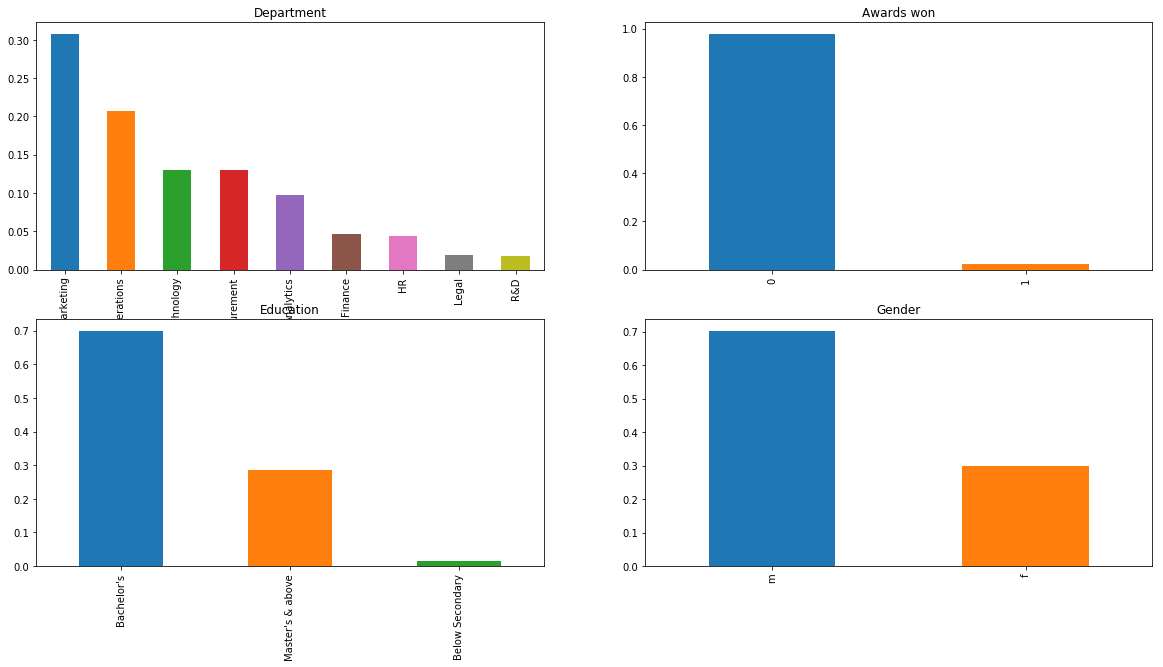

In [15]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [16]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

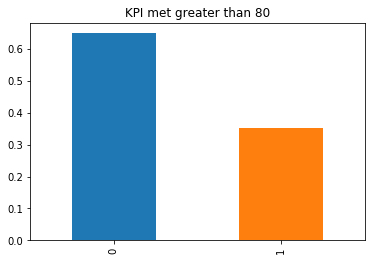

In [17]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


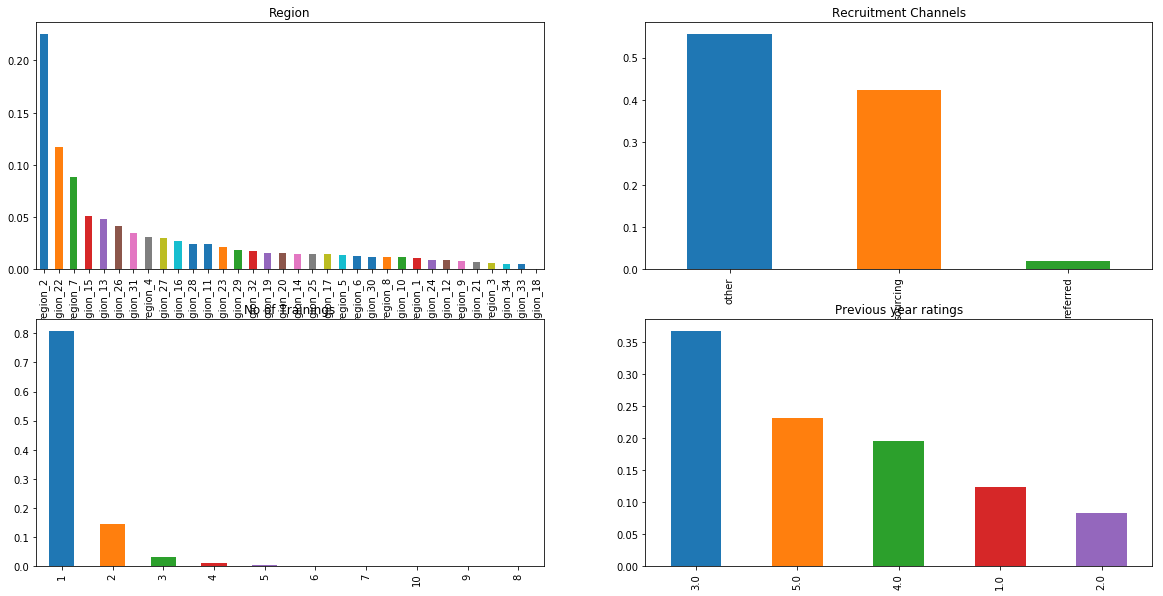

In [18]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [19]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

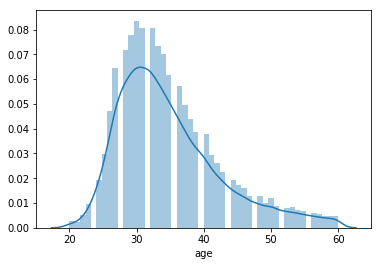

In [20]:
sns.distplot(train['age']);

In [21]:
# Most of the trainee are in the age range of 20-30 and 40-50

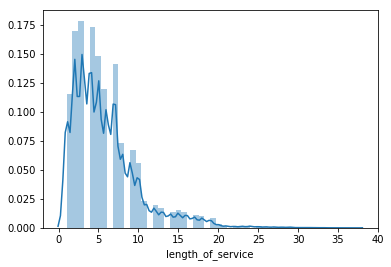

In [22]:
sns.distplot(train['length_of_service']);

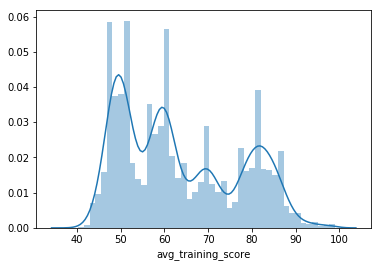

In [23]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

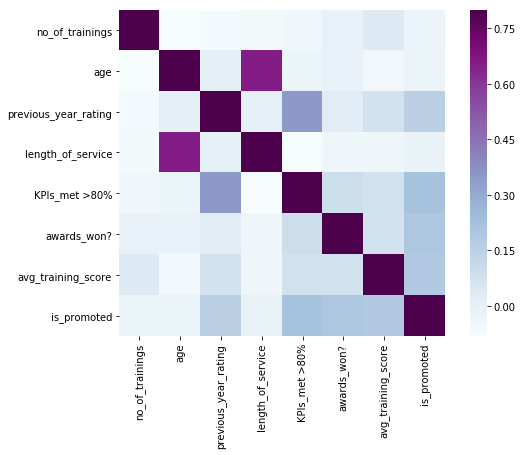

In [24]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [25]:
# Not much correlation between the variables

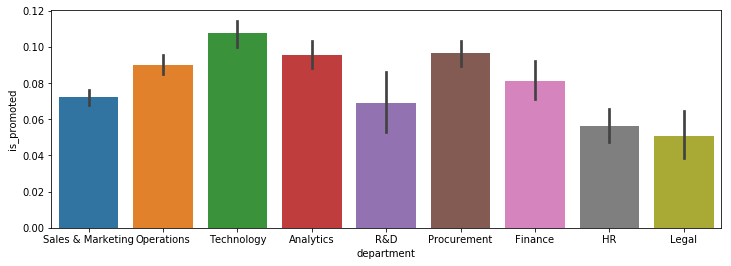

In [26]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

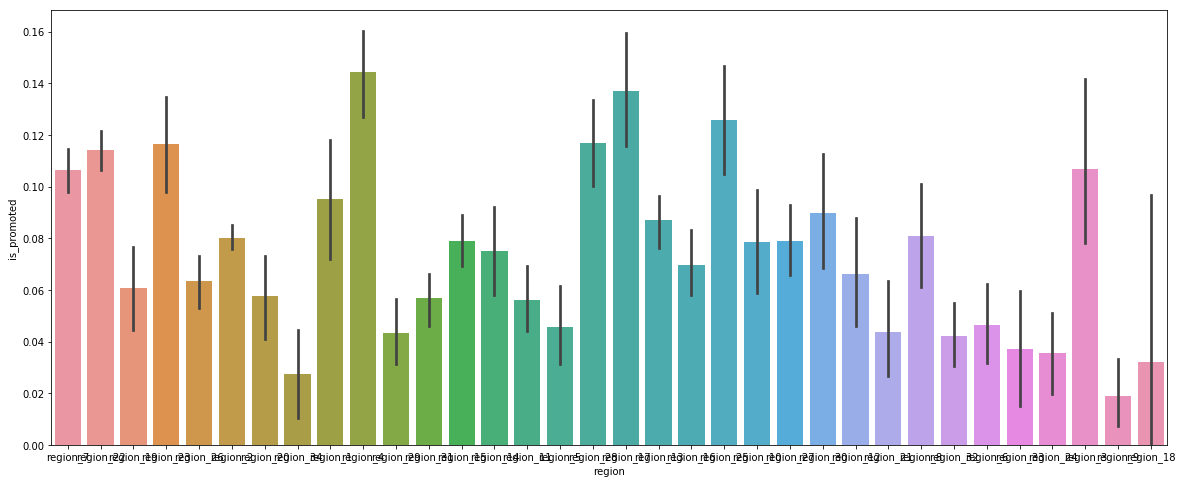

In [27]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [28]:
# Trainee in X and Y program type have higher chances to pass the test

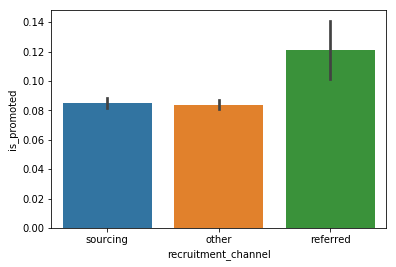

In [29]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [30]:
# Trainee attending online mode of test have higher chances to pass the test

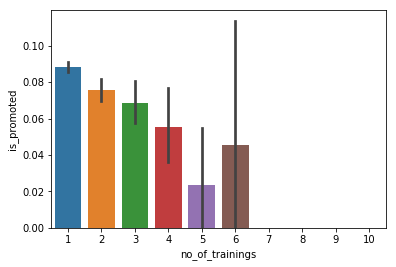

In [31]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [32]:
# If the difficulty level of the test is easy, chances to pass the test are higher

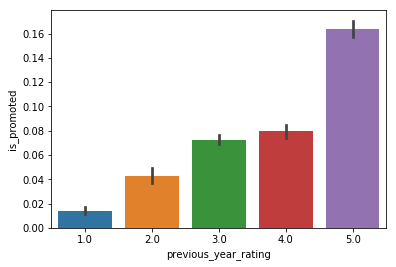

In [33]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [34]:
# Gender does not affect the chances to pass the test

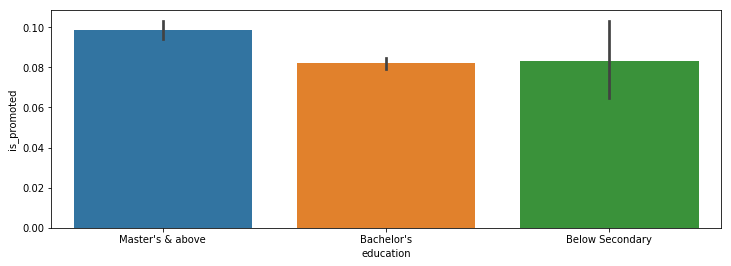

In [35]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [36]:
# Trainee with Masters education level have more chances to pass the test

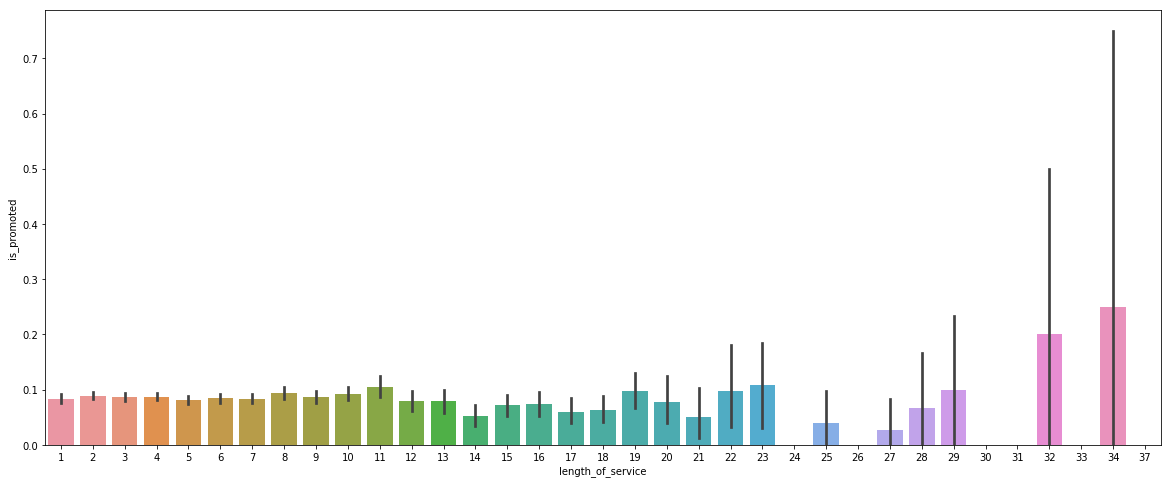

In [37]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [38]:
# Handicapped trainee have less chances to pass the test

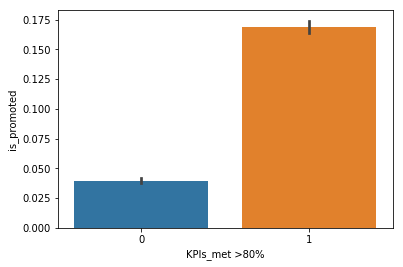

In [39]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [40]:
# Trainee from city tier 1 have higher chances to pass the test

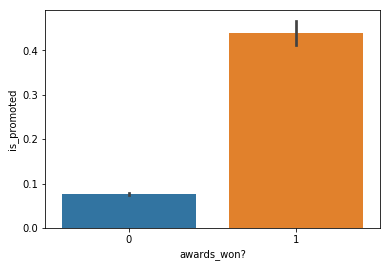

In [41]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [42]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [43]:
# Check the number of missing values in each variable
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [44]:
# age and trainee_engagement_rating variables have missing values in it.

In [45]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [46]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

### Logistic Regression

In [47]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [48]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [49]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,99.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [51]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [50]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors],y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("F1 Score : ",metrics.f1_score(y, dtrain_predictions))

In [58]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1,X, predictors)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
F1 Score :  0.5233615553465036


In [60]:
xgb1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=184,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [ ]:
param_test1 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,6,2)
}

gsearch1 = GridSearchCV(
    
    estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=184,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
param_grid = param_test1, 
scoring='roc_auc',
n_jobs=4,
iid=False, 
cv=5)

gsearch1.fit(X[predictors],y)

gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [ ]:
submission.head()

In [ ]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred

In [ ]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [ ]:
submission.head()

In [ ]:
submission['is_promoted'].value_counts()

In [ ]:
# Converting the submission file to csv format
submission.to_csv('logistic_submission.csv', index=False)

score on leaderboard - 0.71145